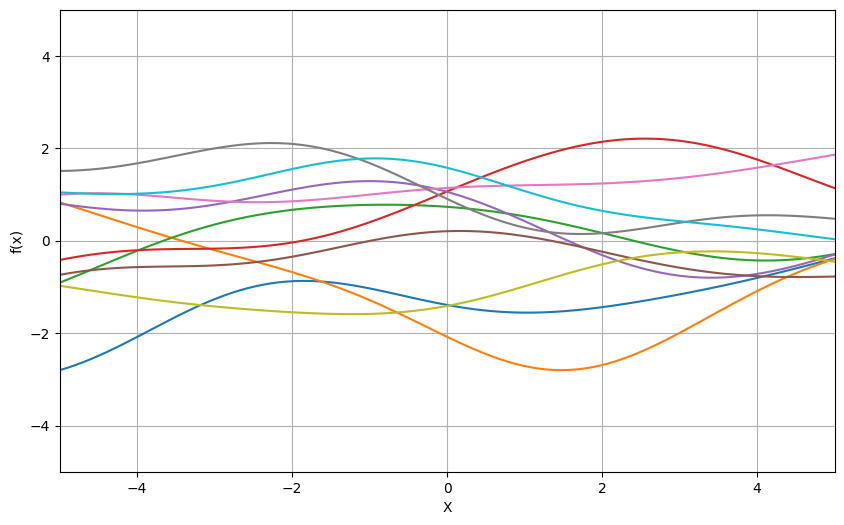

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

np.random.seed(12)

# Define the kernel (RBF kernel with length scale 2.5)
kernel = RBF(length_scale=2.5)

# Define the Gaussian Process with zero mean function and the kernel
gp = GaussianProcessRegressor(kernel=kernel, alpha=1e-10, normalize_y=True)

X = np.linspace(-5, 5, 100).reshape(-1, 1)

n_samples = 10
samples = gp.sample_y(X, n_samples)

# Plot the samples
plt.figure(figsize=(10, 6))
for i in range(n_samples):
    plt.plot(X, samples[:, i], label=f'Sample {i+1}')

plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.grid(True)
plt.xlabel('X')
plt.ylabel('f(x)')
plt.show()

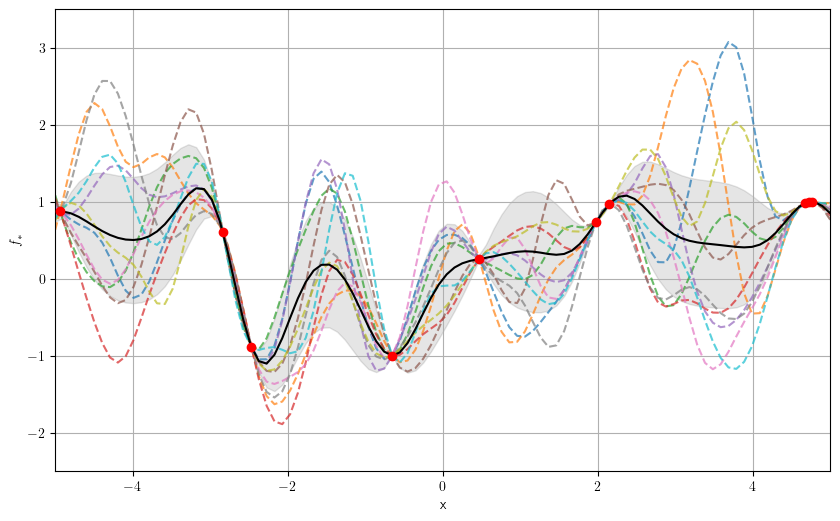

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF


def plot_gpr_samples(gpr_model, n_samples):
    """Plot samples drawn from the Gaussian process model.

    If the Gaussian process model is not trained then the drawn samples are
    drawn from the prior distribution. Otherwise, the samples are drawn from
    the posterior distribution. Be aware that a sample here corresponds to a
    function.

    Parameters
    ----------
    gpr_model : `GaussianProcessRegressor`
        A :class:`~sklearn.gaussian_process.GaussianProcessRegressor` model.
    n_samples : int
        The number of samples to draw from the Gaussian process distribution.
    ax : matplotlib axis
        The matplotlib axis where to plot the samples.
    """
    x = np.linspace(-5, 5, 100)
    X = x.reshape(-1, 1)

    y_mean, y_std = gpr_model.predict(X, return_std=True)
    y_samples = gpr_model.sample_y(X, n_samples)

    for idx, single_prior in enumerate(y_samples.T):
        plt.plot(
            x,
            single_prior,
            linestyle="--",
            alpha=0.7,
            label=f"Sampled function #{idx + 1}",
        )
    plt.plot(x, y_mean, color="black", label="Mean")
    plt.fill_between(
        x,
        y_mean - y_std,
        y_mean + y_std,
        alpha=0.1,
        color="black",
        label=r"$\pm$ 1 std. dev.",
    )
    
rng = np.random.RandomState(4)
X_train = rng.uniform(-5, 5, 10).reshape(-1, 1)
y_train = np.sin((X_train[:, 0] - 3.5) ** 2)
n_samples = 10

kernel = 1.0 * RBF(length_scale=2.5, length_scale_bounds=(1e-1, 10.0))
gpr = GaussianProcessRegressor(kernel=kernel, random_state=0, alpha=1e-10, normalize_y=True)

plt.figure(figsize=(10, 6))
plt.rcParams['text.usetex'] = True

# plot posterior
gpr.fit(X_train, y_train)
plot_gpr_samples(gpr, n_samples=n_samples)
plt.scatter(X_train[:, 0], y_train, color="red", zorder=10, label="Observations")
plt.xlim(-5, 5)
plt.ylim(-2.5, 3.5)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('$f_*$')
plt.show()